In [3]:
import numpy as np
import seaborn as sns ; sns.set(color_codes=True)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

먼저 LDA, QDA, Naive model의 가정들을 비교해보면,

|                      	|                 LDA                	|                QDA               	|                Naive               	|
|----------------------	|:----------------------------------:	|:--------------------------------:	|:----------------------------------:	|
|         분포         	| Gaussian 가정                      	| Gaussian 가정                    	| Gaussian 가정                      	|
|         분산         	| class별로 등분산 가정              	| class별로 이분산 가정            	| class별로 등분산 가정?             	|
| Feature independency 	| feature들끼리 dependent하다고 가정 	| feature끼리 dependent하다고 가정 	| feature끼리 independent하다고 가정 	|

이런 가정들을 확인해보기 위해, 2차원 3차원 4차원 data set을 만들어 본 후 model들끼리 비교해보려고 했습니다.   
   
이때 저는    
2차원 data는 독립변수 1개 종속변수 1개   
3차원 data는 독립변수 2개 종속변수 1개   
4차원 data는 독립변수 3개 종속변수 1개   
이렇게 이해해고 data set을 만들었습니다.   
    



먼저 2차원 data의 경우,   
독립변수가 1개 뿐이여서 feature independency 여부가 model에 영향을 끼치지 못하니, 분산 가정이 model들의 accuracy에 끼치는 영향을 확인해 볼 수 있을 것이라고 생각했습니다.   

다음으로 3,4차원 data의 경우, 다음과 같이 생각했습니다

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-gaal{font-weight:bold;background-color:#00d2cb}
.tg .tg-bmui{font-weight:bold;background-color:#00d2cb;vertical-align:top}
.tg .tg-79v0{background-color:#00d2cb}
.tg .tg-vv23{background-color:#00d2cb;vertical-align:top}
.tg .tg-pauj{font-weight:bold;background-color:#32cb00;border-color:#009901;vertical-align:top}
.tg .tg-hgcj{font-weight:bold;text-align:center}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-oxci{font-weight:bold;background-color:#32cb00}
.tg .tg-xxs3{background-color:#32cb00}
.tg .tg-y0xi{background-color:#32cb00;vertical-align:top}
.tg .tg-w286{background-color:#32cb00;border-color:#009901;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e"></th>
    <th class="tg-hgcj">LDA</th>
    <th class="tg-amwm">QDA</th>
    <th class="tg-amwm">Naive</th>
  </tr>
  <tr>
    <td class="tg-oxci" rowspan="2">case1. 등분산 + dependent</td>
    <td class="tg-xxs3">모든 가정이 만족</td>
    <td class="tg-y0xi">이분산 가정이 깨짐</td>
    <td class="tg-y0xi">independent가정이 깨짐</td>
  </tr>
  <tr>
    <td class="tg-xxs3" colspan="3">모든 가정을 만족하는 LDA가 다른 두 model에 비해 accuracy가 높을 것이라고 생각</td>
  </tr>
  <tr>
    <td class="tg-gaal" rowspan="2">case2. 등분산 + independent</td>
    <td class="tg-79v0">dependent 가정이 깨짐</td>
    <td class="tg-vv23">모든 가정이 깨짐</td>
    <td class="tg-vv23">모든 가정이 만족</td>
  </tr>
  <tr>
    <td class="tg-79v0" colspan="3">모든 가정을 만족하는 Naive가 다른 두 model에 비해 accuracy가 높을 것이라고 생각<br>또한 1개의 가정만 깨진 LDA가 모든 가정이 깨진 QDA보다 accuracy가 높을 것이라고 생각</td>
  </tr>
  <tr>
    <td class="tg-pauj" rowspan="2">case3. 이분산 + dependent</td>
    <td class="tg-w286">등분산 가정이 깨짐</td>
    <td class="tg-w286">모든 가정이 만족</td>
    <td class="tg-w286">모든 가정이 깨짐</td>
  </tr>
  <tr>
    <td class="tg-w286" colspan="3">모든 가정을 만족하는 QDA가 다른 두 model에 비해 accuracy가 높을 것이라고 생각<br>또한 1개의 가정만 깨진 LDA가 모든 가정이 깨진 Naive보다 accuracy가 높을 것이라고 생각</td>
  </tr>
  <tr>
    <td class="tg-bmui" rowspan="2">case4. 이분산 + independent</td>
    <td class="tg-vv23">모든 가정이 깨짐</td>
    <td class="tg-vv23">dependent 가정이 깨짐</td>
    <td class="tg-vv23">등분산 가정이 깨짐</td>
  </tr>
  <tr>
    <td class="tg-vv23" colspan="3">1개의 가정만 깨진 QDA,Naive가 모든 가정이 깨진 LDA보다 accuracy가 높을 것이라고 생각</td>
  </tr>
</table>

이에 2,3,4차원 data에서 이런 결과를 확인해보고자 했습니다.

# 1. Well seperatable

# 데이터 구성하기

In [19]:
### 1 input variable ###

In [4]:
# case1. Gausian + Same Variance
np.random.seed(42)

a_samescale = np.random.normal(loc=2, scale=0.3,size=1000)
b_samescale = np.random.normal(loc=4.5, scale=0.3,size=1000)

df1_1=pd.DataFrame()
df1_1['V1']=np.append(a_samescale, b_samescale)

df1_1['y']=np.repeat(['a','b'],[1000,1000])

# case2. Gausian + Differ Variance
np.random.seed(42)

a_diffscale = np.random.normal(loc=2, scale=0.1,size=1000)
b_diffscale = np.random.normal(loc=4.5, scale=0.3,size=1000)

df1_2=pd.DataFrame()
df1_2['V1']=np.append(a_diffscale, b_diffscale)

df1_2['y']=np.repeat(['a','b'],[1000,1000])

C:\Users\YoungJun\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


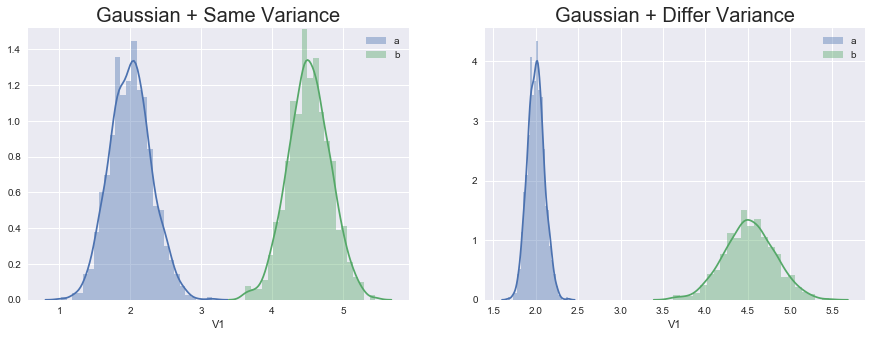

In [11]:
fig=plt.figure(figsize=(15,5))

ax1=fig.add_subplot(1,2,1)
sns.distplot(df1_1[df1_1.y == 'a'].V1,label='a',ax=ax1)
sns.distplot(df1_1[df1_1.y == 'b'].V1,label='b',ax=ax1)
ax1.set_title('Gaussian + Same Variance',fontsize=20)
ax1.legend()

ax2=fig.add_subplot(1,2,2)
sns.distplot(df1_2[df1_2.y == 'a'].V1,label='a',ax=ax2)
sns.distplot(df1_2[df1_2.y == 'b'].V1,label='b',ax=ax2)
ax2.set_title('Gaussian + Differ Variance',fontsize=20)
ax2.legend()

plt.show()

In [ ]:
### 2 input variable ###

In [6]:
# case1. Gausian + Same Variance  + Feature Dependent
np.random.seed(42)

mean1 = [0,0]
cov1 = [[2,1.5],[1.5,3]]
a1_samescale_dependent,b1_samescale_dependent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [7,7]
cov2 = [[2,1.5],[1.5,3]]
a2_samescale_dependent, b2_samescale_dependent = np.random.multivariate_normal(mean2,cov2,1000).T


df2_1=pd.DataFrame()
df2_1['V1']=np.append(a1_samescale_dependent, a2_samescale_dependent)
df2_1['V2']=np.append(b1_samescale_dependent, b2_samescale_dependent)

df2_1['y']=np.repeat(['a','b'],[1000,1000])

# case2. Gausian + Same Variance  + Feature Independent
np.random.seed(42)

mean1 = [0,0]
cov1 = [[2,0],[0,3]]
a1_samescale_independent,b1_samescale_independent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [7,7]
cov2 = [[2,0],[0,3]]
a2_samescale_independent, b2_samescale_independent = np.random.multivariate_normal(mean2,cov2,1000).T


df2_2=pd.DataFrame()
df2_2['V1']=np.append(a1_samescale_independent, a2_samescale_independent)
df2_2['V2']=np.append(b1_samescale_independent, b2_samescale_independent)

df2_2['y']=np.repeat(['a','b'],[1000,1000])

# case3. Gausian + Differ Variance  + Feature Dependent
np.random.seed(42)

mean1 = [0,0]
cov1 = [[2,0.5],[0.5,3]]
a1_diffscale_dependent,b1_diffscale_dependent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [8,8]
cov2 = [[4,2.5],[2.5,6]]
a2_diffscale_dependent, b2_diffscale_dependent = np.random.multivariate_normal(mean2,cov2,1000).T


df2_3=pd.DataFrame()
df2_3['V1']=np.append(a1_diffscale_dependent, a2_diffscale_dependent)
df2_3['V2']=np.append(b1_diffscale_dependent, b2_diffscale_dependent)

df2_3['y']=np.repeat(['a','b'],[1000,1000])

# case4. Gausian + Differ Variance  + Feature Independent
np.random.seed(42)

mean1 = [0,0]
cov1 = [[2,0],[0,3]]
a1_diffscale_independent,b1_diffscale_independent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [8,8]
cov2 = [[4,0],[0,6]]
a2_diffscale_independent, b2_diffscale_independent = np.random.multivariate_normal(mean2,cov2,1000).T


df2_4=pd.DataFrame()
df2_4['V1']=np.append(a1_diffscale_independent, a2_diffscale_independent)
df2_4['V2']=np.append(b1_diffscale_independent, b2_diffscale_independent)

df2_4['y']=np.repeat(['a','b'],[1000,1000])

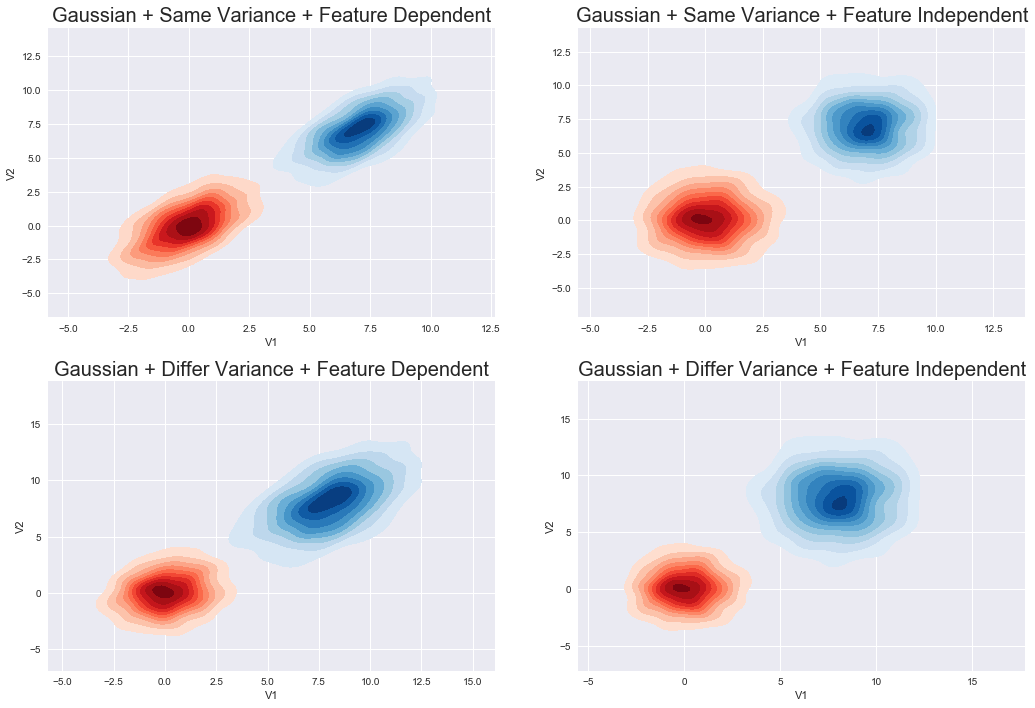

In [10]:
fig=plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,2,1)
sns.kdeplot(df2_1[df2_1.y =='a'].V1, df2_1[df2_1.y =='a'].V2,cmap='Reds', shade=True,shade_lowest=False)
sns.kdeplot(df2_1[df2_1.y =='b'].V1, df2_1[df2_1.y =='b'].V2,cmap='Blues', shade=True,shade_lowest=False)
ax1.set_title('Gaussian + Same Variance + Feature Dependent',fontsize=20)

ax2=fig.add_subplot(2,2,2)
sns.kdeplot(df2_2[df2_2.y =='a'].V1, df2_2[df2_2.y =='a'].V2, cmap='Reds', shade=True,shade_lowest=False)
sns.kdeplot(df2_2[df2_2.y =='b'].V1, df2_2[df2_2.y =='b'].V2, cmap='Blues', shade=True,shade_lowest=False)
ax2.set_title('Gaussian + Same Variance + Feature Independent',fontsize=20)

ax3=fig.add_subplot(2,2,3)
sns.kdeplot(df2_3[df2_3.y =='a'].V1, df2_3[df2_3.y =='a'].V2, cmap='Reds', shade=True,shade_lowest=False)
sns.kdeplot(df2_3[df2_3.y =='b'].V1, df2_3[df2_3.y =='b'].V2, cmap='Blues', shade=True,shade_lowest=False)
ax3.set_title('Gaussian + Differ Variance + Feature Dependent',fontsize=20)

ax4=fig.add_subplot(2,2,4)
sns.kdeplot(df2_4[df2_4.y =='a'].V1, df2_4[df2_4.y =='a'].V2, cmap='Reds', shade=True,shade_lowest=False)
sns.kdeplot(df2_4[df2_4.y =='b'].V1, df2_4[df2_4.y =='b'].V2, cmap='Blues', shade=True,shade_lowest=False)
ax4.set_title('Gaussian + Differ Variance + Feature Independent',fontsize=20)

plt.tight_layout()
plt.show()

In [33]:
### 3 input variable ###

In [13]:
# case1. Gausian + Same Variance  + Feature Dependent
np.random.seed(42)

mean1 = [0,0,0]
cov1 = [[2,1.5,1],[1.5,3,2],[1,2,4]]
a1_samescale_dependent,b1_samescale_dependent,c1_samescale_dependent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [9,9,9]
cov2 = [[2,1.5,1],[1.5,3,2],[1,2,4]]
a2_samescale_dependent, b2_samescale_dependent, c2_samescale_dependent = np.random.multivariate_normal(mean2,cov2,1000).T

df3_1=pd.DataFrame()
df3_1['V1']=np.append(a1_samescale_dependent, a2_samescale_dependent)
df3_1['V2']=np.append(b1_samescale_dependent, b2_samescale_dependent)
df3_1['V3']=np.append(c1_samescale_dependent, c2_samescale_dependent)

df3_1['y'] =np.repeat(['a','b'],[1000,1000])


# case2. Gausian + Same Variance  + Feature Independent
np.random.seed(42)

mean1 = [0,0,0]
cov1 = [[2,0,0],[0,3,0],[0,0,4]]
a1_samescale_independent,b1_samescale_independent,c1_samescale_independent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [7,7,7]
cov2 = [[2,0,0],[0,3,0],[0,0,4]]
a2_samescale_independent, b2_samescale_independent, c2_samescale_independent = np.random.multivariate_normal(mean2,cov2,1000).T

df3_2=pd.DataFrame()
df3_2['V1']=np.append(a1_samescale_independent, a2_samescale_independent)
df3_2['V2']=np.append(b1_samescale_independent, b2_samescale_independent)
df3_2['V3']=np.append(c1_samescale_independent, c2_samescale_independent)

df3_2['y'] =np.repeat(['a','b'],[1000,1000])


# case3. Gausian + Differ Variance  + Feature Dependent
np.random.seed(42)

mean1 = [0,0,0]
cov1 = [[2,1.5,1],[1.5,6,2],[1,2,4]]
a1_diffscale_dependent,b1_diffscale_dependent,c1_diffscale_dependent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [8,8,8]
cov2 = [[1,1.5,1],[1.5,5,2],[1,2,1.5]]
a2_diffscale_dependent, b2_diffscale_dependent, c2_diffscale_dependent = np.random.multivariate_normal(mean2,cov2,1000).T

df3_3=pd.DataFrame()
df3_3['V1']=np.append(a1_diffscale_dependent, a2_diffscale_dependent)
df3_3['V2']=np.append(b1_diffscale_dependent, b2_diffscale_dependent)
df3_3['V3']=np.append(c1_diffscale_dependent, c2_diffscale_dependent)

df3_3['y'] =np.repeat(['a','b'],[1000,1000])


# case4. Gausian + Differ Variance  + Feature Independent
np.random.seed(42)

mean1 = [0,0,0]
cov1 = [[2,0,0],[0,3,0],[0,0,4]]
a1_diffscale_independent,b1_diffscale_independent,c1_diffscale_independent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [9,9,9]
cov2 = [[5.5,0,0],[0,8,0],[0,0,6]]
a2_diffscale_independent, b2_diffscale_independent, c2_diffscale_independent = np.random.multivariate_normal(mean2,cov2,1000).T

df3_4=pd.DataFrame()
df3_4['V1']=np.append(a1_diffscale_independent, a2_diffscale_independent)
df3_4['V2']=np.append(b1_diffscale_independent, b2_diffscale_independent)
df3_4['V3']=np.append(c1_diffscale_independent, c2_diffscale_independent)

df3_4['y'] =np.repeat(['a','b'],[1000,1000])

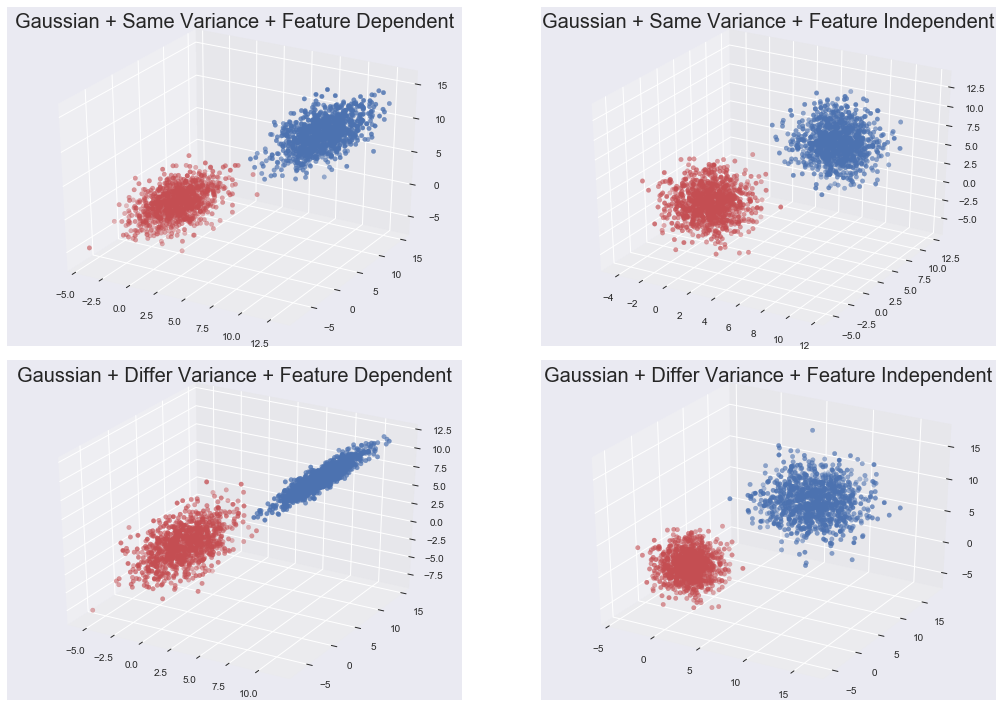

In [14]:
fig=plt.figure(figsize=(15,10))

c_map ={'a':'r', 'b':'b'}

ax1=fig.add_subplot(2,2,1,projection='3d')
ax1.scatter(df3_1.V1, df3_1.V2, df3_1.V3, c=[c_map[_] for _ in df3_1.y])
ax1.set_title('Gaussian + Same Variance + Feature Dependent',fontsize=20)

ax2=fig.add_subplot(2,2,2,projection='3d')
ax2.scatter(df3_2.V1, df3_2.V2, df3_2.V3, c=[c_map[_] for _ in df3_2.y])
ax2.set_title('Gaussian + Same Variance + Feature Independent',fontsize=20)

ax3=fig.add_subplot(2,2,3,projection='3d')
ax3.scatter(df3_3.V1, df3_3.V2, df3_3.V3, c=[c_map[_] for _ in df3_3.y])
ax3.set_title('Gaussian + Differ Variance + Feature Dependent',fontsize=20)

ax4=fig.add_subplot(2,2,4,projection='3d')
ax4.scatter(df3_4.V1, df3_4.V2, df3_4.V3, c=[c_map[_] for _ in df3_4.y])
ax4.set_title('Gaussian + Differ Variance + Feature Independent',fontsize=20)

plt.tight_layout()
plt.show()

# Model Fitting without CV

In [15]:
### 데이터 분할 ###

# 1 input variable

X1_1_train, X1_1_test, y1_1_train, y1_1_test = train_test_split(df1_1.loc[:,['V1']],df1_1.y,test_size=0.3,random_state=21)
X1_2_train, X1_2_test, y1_2_train, y1_2_test = train_test_split(df1_2.loc[:,['V1']],df1_2.y,test_size=0.3,random_state=21)

# 2 input variable
    
X2_1_train, X2_1_test, y2_1_train, y2_1_test = train_test_split(df2_1.loc[:,['V1','V2']],df2_1.y,test_size=0.3,random_state=21)
X2_2_train, X2_2_test, y2_2_train, y2_2_test = train_test_split(df2_2.loc[:,['V1','V2']],df2_2.y,test_size=0.3,random_state=21)
X2_3_train, X2_3_test, y2_3_train, y2_3_test = train_test_split(df2_3.loc[:,['V1','V2']],df2_3.y,test_size=0.3,random_state=21)
X2_4_train, X2_4_test, y2_4_train, y2_4_test = train_test_split(df2_4.loc[:,['V1','V2']],df2_4.y,test_size=0.3,random_state=21)

# 3 input variable

X3_1_train, X3_1_test, y3_1_train, y3_1_test = train_test_split(df3_1.loc[:,['V1','V2','V3']],df3_1.y,test_size=0.3,random_state=21)
X3_2_train, X3_2_test, y3_2_train, y3_2_test = train_test_split(df3_2.loc[:,['V1','V2','V3']],df3_2.y,test_size=0.3,random_state=21)
X3_3_train, X3_3_test, y3_3_train, y3_3_test = train_test_split(df3_3.loc[:,['V1','V2','V3']],df3_3.y,test_size=0.3,random_state=21)
X3_4_train, X3_4_test, y3_4_train, y3_4_test = train_test_split(df3_4.loc[:,['V1','V2','V3']],df3_4.y,test_size=0.3,random_state=21)

In [16]:
def evaluate_withoutCV(X_train,X_test,y_train,y_test):
    # Name of models
    model_name_list=['LDA','QDA','Naive','Logistic']
    
    model1 = LinearDiscriminantAnalysis()
    model2 = QuadraticDiscriminantAnalysis()
    model3 = GaussianNB()
    model4 = LogisticRegression()
    
    # DataFrame for result
    result = pd.DataFrame()
     
    # Train and predict with each model
    accuracy=[]
    coef=[]
        
    for i, model in enumerate([model1,model2,model3,model4]):
        model.fit(X_train,y_train)
        prediction = model.predict(X_test)
        
        accuracy.append(accuracy_score(y_test, prediction))
        
        try:
            coef.append(model.coef_[0,0]) 
        except:
            coef.append(0)
     
    result['model'] = ['LDA','QDA','Naive','Logistic']
    result['accuracy'] = accuracy
    result['coef'] = coef
    
    return result

## - 1 input variable

In [17]:
##### (case1. Gausian + Same Variance)
result1 = evaluate_withoutCV(X1_1_train,X1_1_test,y1_1_train,y1_1_test)

result1

,model,accuracy,coef
0,LDA,1.0,27.953762
1,QDA,1.0,0.000000
2,Naive,1.0,0.000000
3,Logistic,1.0,3.245435


In [18]:
##### (case2. Gausian + Differ Variance)
result2 = evaluate_withoutCV(X1_2_train,X1_2_test,y1_2_train,y1_2_test)

result2

,model,accuracy,coef
0,LDA,1.0,49.019693
1,QDA,1.0,0.000000
2,Naive,1.0,0.000000
3,Logistic,1.0,3.251092


## - 2 input variable

In [20]:
##### (case1. Gausian + Same Variance  + Feature Dependent)
result1 = evaluate_withoutCV(X2_1_train,X2_1_test,y2_1_train,y2_1_test)

result1

,model,accuracy,coef
0,LDA,0.991667,2.782999
1,QDA,0.991667,0.000000
2,Naive,0.990000,0.000000
3,Logistic,0.990000,1.458629


In [21]:
##### (case2. Gausian + Same Variance  + Feature independent)
result2 = evaluate_withoutCV(X2_2_train,X2_2_test,y2_2_train,y2_2_test)

result2

,model,accuracy,coef
0,LDA,0.996667,3.402598
1,QDA,0.998333,0.000000
2,Naive,0.998333,0.000000
3,Logistic,0.998333,1.121828


In [22]:
##### (case3. Gausian + Diff Variance  + Feature Dependent)
result3 = evaluate_withoutCV(X2_3_train,X2_3_test,y2_3_train,y2_3_test)

result3

,model,accuracy,coef
0,LDA,0.991667,1.964600
1,QDA,0.998333,0.000000
2,Naive,1.000000,0.000000
3,Logistic,0.998333,1.159824


In [23]:
##### (case4. Gausian + Diff Variance  + Feature Independent)
result4 = evaluate_withoutCV(X2_4_train,X2_4_test,y2_4_train,y2_4_test)

result4

,model,accuracy,coef
0,LDA,0.996667,2.593670
1,QDA,0.996667,0.000000
2,Naive,0.996667,0.000000
3,Logistic,0.996667,1.073801


## - 3 input variable

In [24]:
##### (case1. Gausian + Same Variance  + Feature Dependent)
result1 = evaluate_withoutCV(X3_1_train,X3_1_test,y3_1_train,y3_1_test)

result1

,model,accuracy,coef
0,LDA,1.0,3.137580
1,QDA,1.0,0.000000
2,Naive,1.0,0.000000
3,Logistic,1.0,0.889617


In [25]:
##### (case2. Gausian + Same Variance  + Feature independent)
result2 = evaluate_withoutCV(X3_2_train,X3_2_test,y3_2_train,y3_2_test)

result2

,model,accuracy,coef
0,LDA,1.0,3.546504
1,QDA,1.0,0.000000
2,Naive,1.0,0.000000
3,Logistic,1.0,0.835112


In [26]:
##### (case3. Gausian + Diff Variance  + Feature Dependent)
result3 = evaluate_withoutCV(X3_3_train,X3_3_test,y3_3_train,y3_3_test)

result3

,model,accuracy,coef
0,LDA,1.000000,5.057678
1,QDA,1.000000,0.000000
2,Naive,0.998333,0.000000
3,Logistic,0.998333,1.305119


In [27]:
##### (case4. Gausian + Diff Variance  + Feature Independent)
result4 = evaluate_withoutCV(X3_4_train,X3_4_test,y3_4_train,y3_4_test)

result4

,model,accuracy,coef
0,LDA,1.0,2.458071
1,QDA,1.0,0.000000
2,Naive,1.0,0.000000
3,Logistic,1.0,0.658884


# Model Fitting with CV

In [28]:
def evaluate_withCV(df):
    # Name of models
    model_name_list=['LDA','QDA','Naive','Logistic']
    
    model1 = LinearDiscriminantAnalysis()
    model2 = QuadraticDiscriminantAnalysis()
    model3 = GaussianNB()
    model4 = LogisticRegression()
    
    # cv
    n_row = len(df)
    np.random.seed(42)
    suffled_index=np.random.permutation(n_row)
    
    treshold1 = int(n_row*0.2)
    treshold2 = int(n_row*0.4)
    treshold3 = int(n_row*0.6)
    treshold4 = int(n_row*0.8)    

    fold1_index = suffled_index[:treshold1]
    fold2_index = suffled_index[treshold1:treshold2]
    fold3_index = suffled_index[treshold2:treshold3]
    fold4_index = suffled_index[treshold3:treshold4]
    fold5_index = suffled_index[treshold4:]    
      
    fold_index=[fold1_index,fold2_index,fold3_index,fold4_index,fold5_index]
    
    # DataFrame for result
    result = pd.DataFrame()
     
    # Train and predict with each model
    accuracy_mean=[]
    coef_matrix = pd.DataFrame(columns=df.columns.tolist()[:-1])        
    
    for i, model in enumerate([model1,model2,model3,model4]):
        for index in fold_index:
            cv_test = df.iloc[index]
            cv_train = df.drop(index)

            model.fit(cv_train.iloc[:,:-1], cv_train.iloc[:,-1])
            prediction=model.predict(cv_test.iloc[:,:-1])

            accuracy=[]

            accuracy.append(accuracy_score(cv_test.iloc[:,-1], prediction))
            try:
                coef_matrix = coef_matrix.append(pd.DataFrame(model.coef_, columns=df.columns.tolist()[:-1]))
            except:
                coef_matrix = coef_matrix.append(pd.DataFrame([[0]*(len(df.columns)-1)],columns=df.columns.tolist()[:-1]))

        accuracy_mean.append(np.mean(accuracy))
        
        
   
     
     
    result['model'] = ['LDA','QDA','Naive','Logistic']
    result['accuracy_mean'] = accuracy_mean
    
    
    return result, coef_matrix

## - 1 input variable

In [29]:
##### (case1. Gausian + Same Variance)
result_accuracy=evaluate_withCV(df1_1)[0]
LDA_coef=evaluate_withCV(df1_1)[1][:5]
Logistic_coef=evaluate_withCV(df1_1)[1][15:]

In [30]:
result_accuracy

,model,accuracy_mean
0,LDA,1.0
1,QDA,1.0
2,Naive,1.0
3,Logistic,1.0


In [31]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef, LDA_coef.var(axis=0)

(            V1
 cv1  28.961930
 cv2  28.541062
 cv3  28.515997
 cv4  28.693463
 cv5  28.359482, V1    0.051768
 dtype: float64)

In [376]:
LDA_coef.var(axis=0)

V1    0.051768
dtype: float64

In [373]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1
cv1,3.323794
cv2,3.337330
cv3,3.327300
cv4,3.330127
cv5,3.334013


In [379]:
Logistic_coef.var(axis=0)

V1    0.000029
dtype: float64

In [387]:
##### (case2. Gausian + Differ Variance)
result_accuracy=evaluate_withCV(df1_2)[0]
LDA_coef=evaluate_withCV(df1_2)[1][:5]
Logistic_coef=evaluate_withCV(df1_2)[1][15:]

In [388]:
result_accuracy

,model,accuracy_mean
0,LDA,1.0
1,QDA,1.0
2,Naive,1.0
3,Logistic,1.0


In [389]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef

,V1
cv1,51.165711
cv2,50.306810
cv3,50.043446
cv4,51.582782
cv5,51.067041


In [390]:
LDA_coef.var(axis=0)

V1    0.406979
dtype: float64

In [391]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1
cv1,3.328402
cv2,3.337431
cv3,3.323331
cv4,3.326676
cv5,3.331330


In [392]:
Logistic_coef.var(axis=0)

V1    0.000028
dtype: float64

## - 2 input variable

In [393]:
##### (case1. Gausian + Same Variance  + Feature Dependent)
result_accuracy=evaluate_withCV(df2_1)[0]
LDA_coef=evaluate_withCV(df2_1)[1][:5]
Logistic_coef=evaluate_withCV(df2_1)[1][15:]

In [395]:
result_accuracy

,model,accuracy_mean
0,LDA,0.9950
1,QDA,0.9950
2,Naive,0.9975
3,Logistic,0.9950


In [396]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef

,V1,V2
cv1,2.743624,1.026091
cv2,2.723708,1.011716
cv3,2.864498,1.034127
cv4,2.722170,1.083140
cv5,2.878452,1.049050


In [397]:
LDA_coef.var(axis=0)

V1    0.006115
V2    0.000742
dtype: float64

In [398]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1,V2
cv1,1.398344,0.555094
cv2,1.363127,0.601188
cv3,1.440700,0.574588
cv4,1.350460,0.610247
cv5,1.441603,0.526069


In [399]:
Logistic_coef.var(axis=0)

V1    0.001799
V2    0.001177
dtype: float64

In [400]:
##### (case2. Gausian + Same Variance  + Feature independent)
result_accuracy=evaluate_withCV(df2_2)[0]
LDA_coef=evaluate_withCV(df2_2)[1][:5]
Logistic_coef=evaluate_withCV(df2_2)[1][15:]

In [402]:
result_accuracy

,model,accuracy_mean
0,LDA,1.0
1,QDA,1.0
2,Naive,1.0
3,Logistic,1.0


In [403]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef

,V1,V2
cv1,3.312002,2.329990
cv2,3.341103,2.233844
cv3,3.392791,2.356033
cv4,3.301855,2.269949
cv5,3.355180,2.418490


In [404]:
LDA_coef.var(axis=0)

V1    0.001314
V2    0.005253
dtype: float64

In [405]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1,V2
cv1,1.073489,0.886006
cv2,1.094039,0.860613
cv3,1.127878,0.826040
cv4,1.114005,0.842088
cv5,1.068657,0.869075


In [406]:
Logistic_coef.var(axis=0)

V1    0.000649
V2    0.000545
dtype: float64

In [407]:
##### (case3. Gausian + Differ Variance  + Feature Dependent)
result_accuracy=evaluate_withCV(df2_3)[0]
LDA_coef=evaluate_withCV(df2_3)[1][:5]
Logistic_coef=evaluate_withCV(df2_3)[1][15:]

In [408]:
result_accuracy

,model,accuracy_mean
0,LDA,0.9925
1,QDA,0.9950
2,Naive,0.9925
3,Logistic,0.9975


In [409]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef

,V1,V2
cv1,1.984908,1.121623
cv2,1.952785,1.096435
cv3,2.035575,1.162007
cv4,1.960469,1.151231
cv5,2.059294,1.179922


In [410]:
LDA_coef.var(axis=0)

V1    0.002198
V2    0.001104
dtype: float64

In [411]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1,V2
cv1,1.176988,0.813901
cv2,1.132355,0.815571
cv3,1.197336,0.777819
cv4,1.131160,0.827651
cv5,1.173940,0.787343


In [412]:
Logistic_coef.var(axis=0)

V1    0.000861
V2    0.000438
dtype: float64

In [413]:
##### (case4. Gausian + Differ Variance  + Feature Independent)
result_accuracy=evaluate_withCV(df2_4)[0]
LDA_coef=evaluate_withCV(df2_4)[1][:5]
Logistic_coef=evaluate_withCV(df2_4)[1][15:]

In [414]:
result_accuracy

,model,accuracy_mean
0,LDA,0.9975
1,QDA,0.9975
2,Naive,0.9975
3,Logistic,0.9975


In [415]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef

,V1,V2
cv1,2.517906,1.737531
cv2,2.532321,1.656286
cv3,2.573077,1.748543
cv4,2.520419,1.688973
cv5,2.593475,1.818624


In [416]:
LDA_coef.var(axis=0)

V1    0.001152
V2    0.003843
dtype: float64

In [417]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1,V2
cv1,1.033194,0.831898
cv2,1.046947,0.814720
cv3,1.074766,0.780260
cv4,1.065686,0.793219
cv5,1.021188,0.806577


In [418]:
Logistic_coef.var(axis=0)

V1    0.000492
V2    0.000393
dtype: float64

## - 3 input variable

In [419]:
##### (case1. Gausian + Same Variance  + Feature Dependent)
result_accuracy=evaluate_withCV(df3_1)[0]
LDA_coef=evaluate_withCV(df3_1)[1][:5]
Logistic_coef=evaluate_withCV(df3_1)[1][15:]

In [421]:
result_accuracy

,model,accuracy_mean
0,LDA,1.0
1,QDA,1.0
2,Naive,1.0
3,Logistic,1.0


In [422]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef

,V1,V2,V3
cv1,3.266384,0.548766,1.268591
cv2,3.341934,0.389987,1.282899
cv3,3.345855,0.401331,1.227473
cv4,3.316042,0.534031,1.189141
cv5,3.385236,0.444633,1.274591


In [423]:
LDA_coef.var(axis=0)

V1    0.001920
V2    0.005467
V3    0.001558
dtype: float64

In [424]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1,V2,V3
cv1,0.857177,0.226331,0.399045
cv2,0.929922,0.125426,0.442974
cv3,0.931724,0.141410,0.401466
cv4,0.886943,0.264938,0.352103
cv5,0.846235,0.224997,0.386842


In [425]:
Logistic_coef.var(axis=0)

V1    0.001584
V2    0.003618
V3    0.001064
dtype: float64

In [426]:
##### (case2. Gausian + Same Variance  + Feature independent)
result_accuracy=evaluate_withCV(df3_2)[0]
LDA_coef=evaluate_withCV(df3_2)[1][:5]
Logistic_coef=evaluate_withCV(df3_2)[1][15:]

In [427]:
result_accuracy

,model,accuracy_mean
0,LDA,1.0
1,QDA,1.0
2,Naive,1.0
3,Logistic,1.0


In [428]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef

,V1,V2,V3
cv1,3.716165,2.444405,1.964637
cv2,3.531107,2.451490,1.810132
cv3,3.641985,2.355068,1.795739
cv4,3.557523,2.430658,1.874859
cv5,3.629541,2.429618,1.840601


In [429]:
LDA_coef.var(axis=0)

V1    0.005379
V2    0.001496
V3    0.004531
dtype: float64

In [430]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1,V2,V3
cv1,0.902530,0.497185,0.507737
cv2,0.847166,0.574691,0.484919
cv3,0.872056,0.565259,0.472492
cv4,0.819469,0.615925,0.486058
cv5,0.851033,0.581494,0.478948


In [431]:
Logistic_coef.var(axis=0)

V1    0.000958
V2    0.001885
V3    0.000176
dtype: float64

In [432]:
##### (case3. Gausian + Differ Variance  + Feature Dependent)
result_accuracy=evaluate_withCV(df3_3)[0]
LDA_coef=evaluate_withCV(df3_3)[1][:5]
Logistic_coef=evaluate_withCV(df3_3)[1][15:]

In [433]:
result_accuracy

,model,accuracy_mean
0,LDA,1.0000
1,QDA,1.0000
2,Naive,0.9925
3,Logistic,1.0000


In [434]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef

,V1,V2,V3
cv1,5.143741,-0.341851,1.375019
cv2,4.883670,-0.365390,1.323712
cv3,4.981761,-0.362538,1.309999
cv4,4.824915,-0.329485,1.389177
cv5,4.950407,-0.292814,1.287982


In [435]:
LDA_coef.var(axis=0)

V1    0.014588
V2    0.000870
V3    0.001869
dtype: float64

In [436]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1,V2,V3
cv1,1.258574,0.023210,0.333198
cv2,1.290848,0.007760,0.308598
cv3,1.331054,0.016490,0.273585
cv4,1.230132,0.004761,0.391363
cv5,1.273899,0.063961,0.256073


In [437]:
Logistic_coef.var(axis=0)

V1    0.001415
V2    0.000571
V3    0.002840
dtype: float64

In [439]:
##### (case4. Gausian + Differ Variance  + Feature Independent)
result_accuracy=evaluate_withCV(df3_4)[0]
LDA_coef=evaluate_withCV(df3_4)[1][:5]
Logistic_coef=evaluate_withCV(df3_4)[1][15:]

In [440]:
result_accuracy

,model,accuracy_mean
0,LDA,1.0
1,QDA,1.0
2,Naive,1.0
3,Logistic,1.0


In [441]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef

,V1,V2,V3
cv1,2.574775,1.678081,2.115664
cv2,2.455659,1.631436,1.981662
cv3,2.500464,1.570178,1.911433
cv4,2.481059,1.701590,1.929367
cv5,2.556236,1.654579,1.966694


In [442]:
LDA_coef.var(axis=0)

V1    0.002537
V2    0.002537
V3    0.006461
dtype: float64

In [443]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1,V2,V3
cv1,0.698385,0.424805,0.467844
cv2,0.666645,0.479292,0.447861
cv3,0.682479,0.469623,0.449813
cv4,0.647639,0.525569,0.432863
cv5,0.669000,0.483694,0.449470


In [444]:
Logistic_coef.var(axis=0)

V1    0.000358
V2    0.001297
V3    0.000154
dtype: float64

# 2. Not well seperatable

# 데이터 구성하기

In [445]:
### 1 input variable ###

In [675]:
# case1. Gausian + Same Variance
np.random.seed(42)

a_samescale = np.random.normal(loc=2, scale=0.3,size=1000)
b_samescale = np.random.normal(loc=2.4, scale=0.3,size=1000)

df1_1=pd.DataFrame()
df1_1['V1']=np.append(a_samescale, b_samescale)

df1_1['y']=np.repeat(['a','b'],[1000,1000])

# case2. Gausian + Differ Variance
np.random.seed(42)

a_diffscale = np.random.normal(loc=2, scale=1,size=1000)
b_diffscale = np.random.normal(loc=7, scale=5,size=1000)

df1_2=pd.DataFrame()
df1_2['V1']=np.append(a_diffscale, b_diffscale)

df1_2['y']=np.repeat(['a','b'],[1000,1000])

C:\Users\YoungJun\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


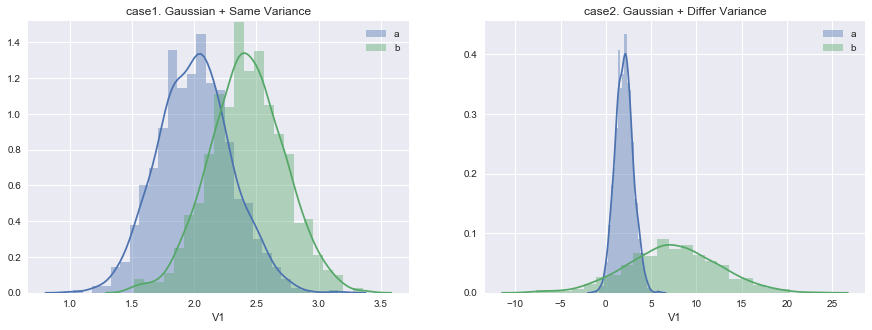

In [676]:
fig=plt.figure(figsize=(15,5))

ax1=fig.add_subplot(1,2,1)
sns.distplot(df1_1[df1_1.y == 'a'].V1,label='a',ax=ax1)
sns.distplot(df1_1[df1_1.y == 'b'].V1,label='b',ax=ax1)
ax1.set_title('case1. Gaussian + Same Variance')
ax1.legend()

ax2=fig.add_subplot(1,2,2)
sns.distplot(df1_2[df1_2.y == 'a'].V1,label='a',ax=ax2)
sns.distplot(df1_2[df1_2.y == 'b'].V1,label='b',ax=ax2)
ax2.set_title('case2. Gaussian + Differ Variance')
ax2.legend()

plt.show()

In [486]:
### 2 input variable ###

In [707]:
# case1. Gausian + Same Variance  + Feature Dependent
np.random.seed(42)

mean1 = [1.2,2]
cov1 = [[4,4],[4,6]]
a1_samescale_dependent,b1_samescale_dependent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [1.7,0]
cov2 = [[4,4],[4,6]]
a2_samescale_dependent, b2_samescale_dependent = np.random.multivariate_normal(mean2,cov2,1000).T


df2_1=pd.DataFrame()
df2_1['V1']=np.append(a1_samescale_dependent, a2_samescale_dependent)
df2_1['V2']=np.append(b1_samescale_dependent, b2_samescale_dependent)

df2_1['y']=np.repeat(['a','b'],[1000,1000])

# case2. Gausian + Same Variance  + Feature Independent
np.random.seed(18)

mean1 = [1.2,2]
cov1 = [[4,0],[0,6]]
a1_samescale_independent,b1_samescale_independent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [2.5,3]
cov2 = [[4,0],[0,6]]
a2_samescale_independent,b2_samescale_independent = np.random.multivariate_normal(mean2, cov2,1000).T


df2_2=pd.DataFrame()
df2_2['V1']=np.append(a1_samescale_independent, a2_samescale_independent)
df2_2['V2']=np.append(b1_samescale_independent, b2_samescale_independent)

df2_2['y']=np.repeat(['a','b'],[1000,1000])

# case3. Gausian + Differ Variance  + Feature Dependent
np.random.seed(42)

mean1 = [2,-1]
cov1 = [[2,4],[6,3]]
a1_diffscale_dependent,b1_diffscale_dependent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [1,0]
cov2 = [[7,4],[6,4]]
a2_diffscale_dependent, b2_diffscale_dependent = np.random.multivariate_normal(mean2,cov2,1000).T


df2_3=pd.DataFrame()
df2_3['V1']=np.append(a1_diffscale_dependent, a2_diffscale_dependent)
df2_3['V2']=np.append(b1_diffscale_dependent, b2_diffscale_dependent)

df2_3['y']=np.repeat(['a','b'],[1000,1000])

# case4. Gausian + Differ Variance  + Feature Independent
np.random.seed(42)

mean1 = [1,2.8]
cov1 = [[6,0],[0,4.5]]
a1_diffscale_independent,b1_diffscale_independent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [3,4.2]
cov2 = [[2,0],[0,2.5]]
a2_diffscale_independent, b2_diffscale_independent = np.random.multivariate_normal(mean2,cov2,1000).T


df2_4=pd.DataFrame()
df2_4['V1']=np.append(a1_diffscale_independent, a2_diffscale_independent)
df2_4['V2']=np.append(b1_diffscale_independent, b2_diffscale_independent)

df2_4['y']=np.repeat(['a','b'],[1000,1000])

C:\Users\YoungJun\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: covariance is not positive-semidefinite.
C:\Users\YoungJun\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: covariance is not positive-semidefinite.


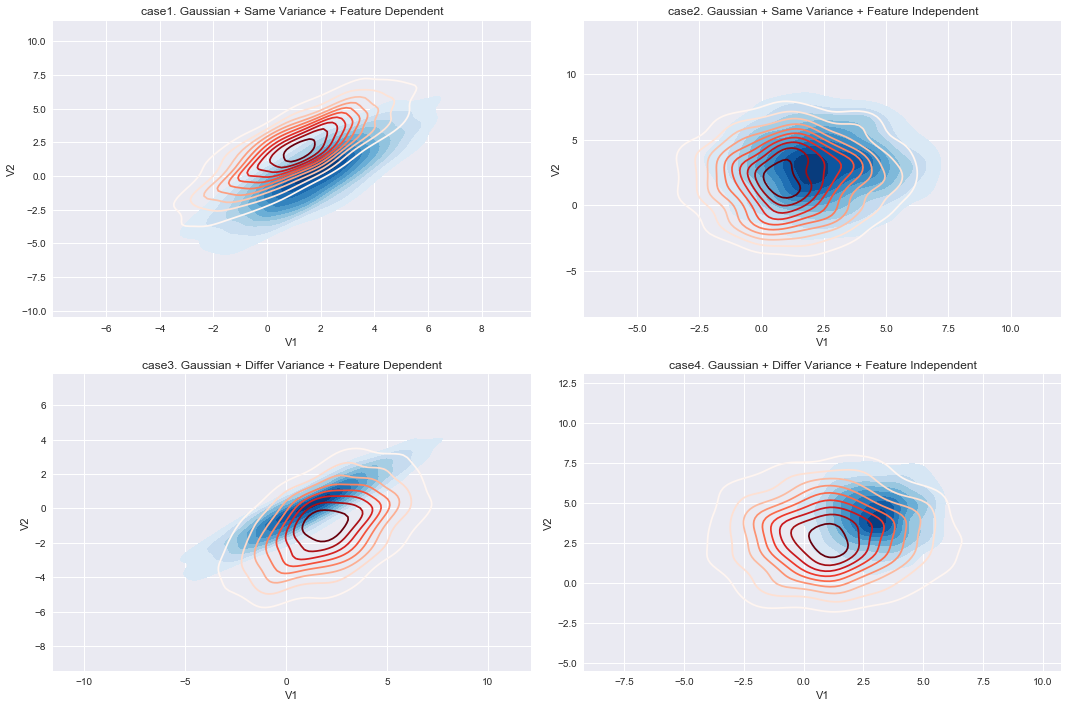

In [708]:
fig=plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,2,1)
sns.kdeplot(df2_1[df2_1.y =='a'].V1, df2_1[df2_1.y =='a'].V2,cmap='Reds')
sns.kdeplot(df2_1[df2_1.y =='b'].V1, df2_1[df2_1.y =='b'].V2,cmap='Blues', shade=True,shade_lowest=False)
ax1.set_title('case1. Gaussian + Same Variance + Feature Dependent')

ax2=fig.add_subplot(2,2,2)
sns.kdeplot(df2_2[df2_2.y =='a'].V1, df2_2[df2_2.y =='a'].V2, cmap='Reds')
sns.kdeplot(df2_2[df2_2.y =='b'].V1, df2_2[df2_2.y =='b'].V2, cmap='Blues', shade=True,shade_lowest=False)
ax2.set_title('case2. Gaussian + Same Variance + Feature Independent')

ax3=fig.add_subplot(2,2,3)
sns.kdeplot(df2_3[df2_3.y =='a'].V1, df2_3[df2_3.y =='a'].V2, cmap='Reds')
sns.kdeplot(df2_3[df2_3.y =='b'].V1, df2_3[df2_3.y =='b'].V2, cmap='Blues', shade=True,shade_lowest=False)
ax3.set_title('case3. Gaussian + Differ Variance + Feature Dependent')

ax4=fig.add_subplot(2,2,4)
sns.kdeplot(df2_4[df2_4.y =='a'].V1, df2_4[df2_4.y =='a'].V2, cmap='Reds')
sns.kdeplot(df2_4[df2_4.y =='b'].V1, df2_4[df2_4.y =='b'].V2, cmap='Blues', shade=True,shade_lowest=False)
ax4.set_title('case4. Gaussian + Differ Variance + Feature Independent')

plt.tight_layout()
plt.show()

In [ ]:
### 3input variable ###

In [734]:
# case1. Gausian + Same Variance  + Feature Dependent
np.random.seed(42)

mean1 = [0,0,0]
cov1 = [[4,3,5],[3,5,6],[5,6,3]]
a1_samescale_dependent,b1_samescale_dependent,c1_samescale_dependent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [4,4,4]
cov2 = [[4,3,5],[3,5,6],[5,6,3]]
a2_samescale_dependent, b2_samescale_dependent, c2_samescale_dependent = np.random.multivariate_normal(mean2,cov2,1000).T

df3_1=pd.DataFrame()
df3_1['V1']=np.append(a1_samescale_dependent, a2_samescale_dependent)
df3_1['V2']=np.append(b1_samescale_dependent, b2_samescale_dependent)
df3_1['V3']=np.append(c1_samescale_dependent, c2_samescale_dependent)

df3_1['y'] =np.repeat(['a','b'],[1000,1000])


# case2. Gausian + Same Variance  + Feature Independent
np.random.seed(42)

mean1 = [0,0,0]
cov1 = [[4,0,0],[0,5,0],[0,0,3.7]]
a1_samescale_independent,b1_samescale_independent,c1_samescale_independent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [2,2.5,1.7]
cov2 = [[4,0,0],[0,5,0],[0,0,3.7]]
a2_samescale_independent, b2_samescale_independent, c2_samescale_independent = np.random.multivariate_normal(mean2,cov2,1000).T

df3_2=pd.DataFrame()
df3_2['V1']=np.append(a1_samescale_independent, a2_samescale_independent)
df3_2['V2']=np.append(b1_samescale_independent, b2_samescale_independent)
df3_2['V3']=np.append(c1_samescale_independent, c2_samescale_independent)

df3_2['y'] =np.repeat(['a','b'],[1000,1000])


# case3. Gausian + Differ Variance  + Feature Dependent
np.random.seed(42)

mean1 = [2.5,1,3]
cov1 = [[2,4.5,6],[4.5,6,5],[6,5,4]]
a1_diffscale_dependent,b1_diffscale_dependent,c1_diffscale_dependent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [4,5,3]
cov2 = [[7,1.5,1],[1.5,2.6,2],[1,2,1.2]]
a2_diffscale_dependent, b2_diffscale_dependent, c2_diffscale_dependent = np.random.multivariate_normal(mean2,cov2,1000).T

df3_3=pd.DataFrame()
df3_3['V1']=np.append(a1_diffscale_dependent, a2_diffscale_dependent)
df3_3['V2']=np.append(b1_diffscale_dependent, b2_diffscale_dependent)
df3_3['V3']=np.append(c1_diffscale_dependent, c2_diffscale_dependent)

df3_3['y'] =np.repeat(['a','b'],[1000,1000])


# case4. Gausian + Differ Variance  + Feature Independent
np.random.seed(42)

mean1 = [2,1.5,3]
cov1 = [[2,0,0],[0,1.5,0],[0,0,3]]
a1_diffscale_independent,b1_diffscale_independent,c1_diffscale_independent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [0,5.2,3.6]
cov2 = [[5.5,0,0],[0,8,0],[0,0,6]]
a2_diffscale_independent, b2_diffscale_independent, c2_diffscale_independent = np.random.multivariate_normal(mean2,cov2,1000).T

df3_4=pd.DataFrame()
df3_4['V1']=np.append(a1_diffscale_independent, a2_diffscale_independent)
df3_4['V2']=np.append(b1_diffscale_independent, b2_diffscale_independent)
df3_4['V3']=np.append(c1_diffscale_independent, c2_diffscale_independent)

df3_4['y'] =np.repeat(['a','b'],[1000,1000])

C:\Users\YoungJun\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  
C:\Users\YoungJun\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\YoungJun\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: covariance is not positive-semidefinite.
C:\Users\YoungJun\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: covariance is not positive-semidefinite.


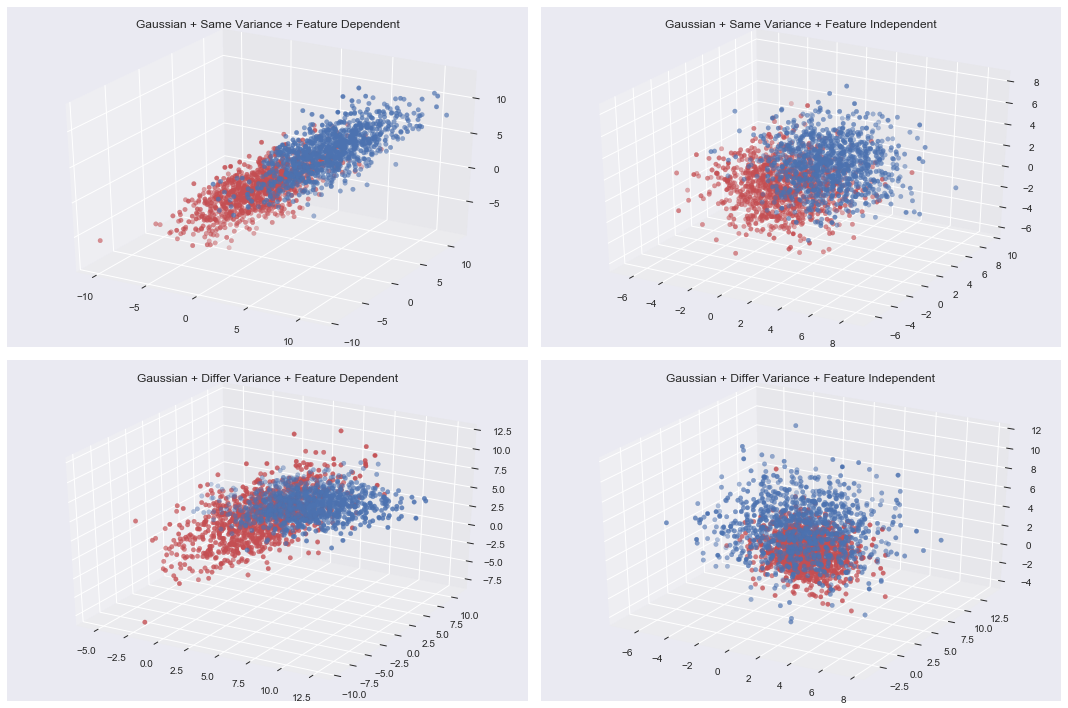

In [735]:
fig=plt.figure(figsize=(15,10))

c_map ={'a':'r', 'b':'b'}

ax1=fig.add_subplot(2,2,1,projection='3d')
ax1.scatter(df3_1.V1, df3_1.V2, df3_1.V3, c=[c_map[_] for _ in df3_1.y])
ax1.set_title('Gaussian + Same Variance + Feature Dependent')

ax2=fig.add_subplot(2,2,2,projection='3d')
ax2.scatter(df3_2.V1, df3_2.V2, df3_2.V3, c=[c_map[_] for _ in df3_2.y])
ax2.set_title('Gaussian + Same Variance + Feature Independent')

ax3=fig.add_subplot(2,2,3,projection='3d')
ax3.scatter(df3_3.V1, df3_3.V2, df3_3.V3, c=[c_map[_] for _ in df3_3.y])
ax3.set_title('Gaussian + Differ Variance + Feature Dependent')

ax4=fig.add_subplot(2,2,4,projection='3d')
ax4.scatter(df3_4.V1, df3_4.V2, df3_4.V3, c=[c_map[_] for _ in df3_4.y])
ax4.set_title('Gaussian + Differ Variance + Feature Independent')

plt.tight_layout()
plt.show()

# Model Fitting without CV

In [736]:
### 데이터 분할 ###

# 1 input variable

X1_1_train, X1_1_test, y1_1_train, y1_1_test = train_test_split(df1_1.loc[:,['V1']],df1_1.y,test_size=0.3,random_state=21)
X1_2_train, X1_2_test, y1_2_train, y1_2_test = train_test_split(df1_2.loc[:,['V1']],df1_2.y,test_size=0.3,random_state=21)

# 2 input variable
    
X2_1_train, X2_1_test, y2_1_train, y2_1_test = train_test_split(df2_1.loc[:,['V1','V2']],df2_1.y,test_size=0.3,random_state=21)
X2_2_train, X2_2_test, y2_2_train, y2_2_test = train_test_split(df2_2.loc[:,['V1','V2']],df2_2.y,test_size=0.3,random_state=21)
X2_3_train, X2_3_test, y2_3_train, y2_3_test = train_test_split(df2_3.loc[:,['V1','V2']],df2_3.y,test_size=0.3,random_state=21)
X2_4_train, X2_4_test, y2_4_train, y2_4_test = train_test_split(df2_4.loc[:,['V1','V2']],df2_4.y,test_size=0.3,random_state=21)

# 3 input variable

X3_1_train, X3_1_test, y3_1_train, y3_1_test = train_test_split(df3_1.loc[:,['V1','V2','V3']],df3_1.y,test_size=0.3,random_state=21)
X3_2_train, X3_2_test, y3_2_train, y3_2_test = train_test_split(df3_2.loc[:,['V1','V2','V3']],df3_2.y,test_size=0.3,random_state=21)
X3_3_train, X3_3_test, y3_3_train, y3_3_test = train_test_split(df3_3.loc[:,['V1','V2','V3']],df3_3.y,test_size=0.3,random_state=21)
X3_4_train, X3_4_test, y3_4_train, y3_4_test = train_test_split(df3_4.loc[:,['V1','V2','V3']],df3_4.y,test_size=0.3,random_state=21)

## - 1 input variable

In [678]:
##### (case1. Gausian + Same Variance)
result1 = evaluate_withoutCV(X1_1_train,X1_1_test,y1_1_train,y1_1_test)

result1

,model,accuracy,coef
0,LDA,0.781667,4.525675
1,QDA,0.781667,0.000000
2,Naive,0.781667,0.000000
3,Logistic,0.785000,3.430647


In [679]:
##### (case2. Gausian + Differ Variance)
result2 = evaluate_withoutCV(X1_2_train,X1_2_test,y1_2_train,y1_2_test)

result2

,model,accuracy,coef
0,LDA,0.866667,0.385234
1,QDA,0.893333,0.000000
2,Naive,0.893333,0.000000
3,Logistic,0.878333,0.479195


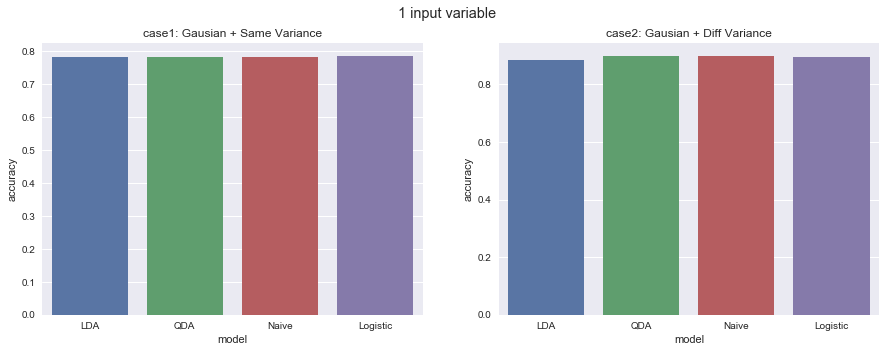

In [663]:
##### 결과
fig=plt.figure(figsize=(15,5))

ax1=fig.add_subplot(1,2,1)
sns.barplot(x='model', y='accuracy', data=result1,ax=ax1)
ax1.set_title('case1: Gausian + Same Variance')

ax2=fig.add_subplot(1,2,2)
sns.barplot(x='model', y='accuracy', data=result2,ax=ax2)
ax2.set_title('case2: Gausian + Diff Variance')

plt.suptitle('1 input variable' )
plt.show()

## - 2 input variable

In [687]:
##### (case1. Gausian + Same Variance  + Feature Dependent)
result1 = evaluate_withoutCV(X2_1_train,X2_1_test,y2_1_train,y2_1_test)

result1

,model,accuracy,coef
0,LDA,0.806667,1.413135
1,QDA,0.808333,0.000000
2,Naive,0.738333,0.000000
3,Logistic,0.806667,1.417600


In [688]:
##### (case2. Gausian + Same Variance  + Feature independent)
result2 = evaluate_withoutCV(X2_2_train,X2_2_test,y2_2_train,y2_2_test)

result2

,model,accuracy,coef
0,LDA,0.626667,0.289359
1,QDA,0.635000,0.000000
2,Naive,0.633333,0.000000
3,Logistic,0.626667,0.287622


In [710]:
##### (case3. Gausian + Diff Variance  + Feature Dependent)
result3 = evaluate_withoutCV(X2_3_train,X2_3_test,y2_3_train,y2_3_test)

result3

,model,accuracy,coef
0,LDA,0.775000,-0.623361
1,QDA,0.796667,0.000000
2,Naive,0.746667,0.000000
3,Logistic,0.761667,-0.679820


In [711]:
##### (case4. Gausian + Diff Variance  + Feature Independent)
result4 = evaluate_withoutCV(X2_4_train,X2_4_test,y2_4_train,y2_4_test)

result4

,model,accuracy,coef
0,LDA,0.716667,0.519309
1,QDA,0.748333,0.000000
2,Naive,0.748333,0.000000
3,Logistic,0.713333,0.517040


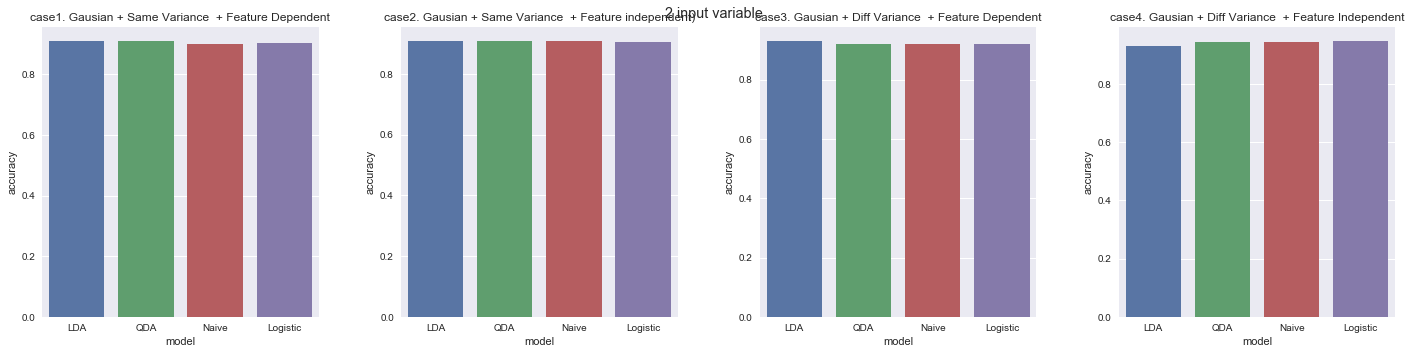

In [522]:
##### 결과

fig=plt.figure(figsize=(20,5))

ax1=fig.add_subplot(1,4,1)
sns.barplot(x='model', y='accuracy', data=result1,ax=ax1)
ax1.set_title('case1. Gausian + Same Variance  + Feature Dependent')

ax2=fig.add_subplot(1,4,2)
sns.barplot(x='model', y='accuracy', data=result2,ax=ax2)
ax2.set_title('case2. Gausian + Same Variance  + Feature independent)')

ax3=fig.add_subplot(1,4,3)
sns.barplot(x='model', y='accuracy', data=result3,ax=ax3)
ax3.set_title('case3. Gausian + Diff Variance  + Feature Dependent')

ax4=fig.add_subplot(1,4,4)
sns.barplot(x='model', y='accuracy', data=result4,ax=ax4)
ax4.set_title('case4. Gausian + Diff Variance  + Feature Independent')

plt.suptitle('2 input variable')
plt.tight_layout()
plt.show()


## - 3 input variable

In [737]:
##### (case1. Gausian + Same Variance  + Feature Dependent)
result1 = evaluate_withoutCV(X3_1_train,X3_1_test,y3_1_train,y3_1_test)

result1

,model,accuracy,coef
0,LDA,0.876667,0.597213
1,QDA,0.880000,0.000000
2,Naive,0.870000,0.000000
3,Logistic,0.873333,0.588063


In [738]:
##### (case2. Gausian + Same Variance  + Feature independent)
result2 = evaluate_withoutCV(X3_2_train,X3_2_test,y3_2_train,y3_2_test)

result2

,model,accuracy,coef
0,LDA,0.781667,0.461524
1,QDA,0.785000,0.000000
2,Naive,0.783333,0.000000
3,Logistic,0.781667,0.447772


In [739]:
##### (case3. Gausian + Diff Variance  + Feature Dependent)
result3 = evaluate_withoutCV(X3_3_train,X3_3_test,y3_3_train,y3_3_test)

result3

,model,accuracy,coef
0,LDA,0.966667,-0.511546
1,QDA,0.973333,0.000000
2,Naive,0.885000,0.000000
3,Logistic,0.970000,-0.398702


In [740]:
##### (case4. Gausian + Diff Variance  + Feature Independent)
result4 = evaluate_withoutCV(X3_4_train,X3_4_test,y3_4_train,y3_4_test)

result4

,model,accuracy,coef
0,LDA,0.848333,-0.442352
1,QDA,0.886667,0.000000
2,Naive,0.885000,0.000000
3,Logistic,0.833333,-0.481547


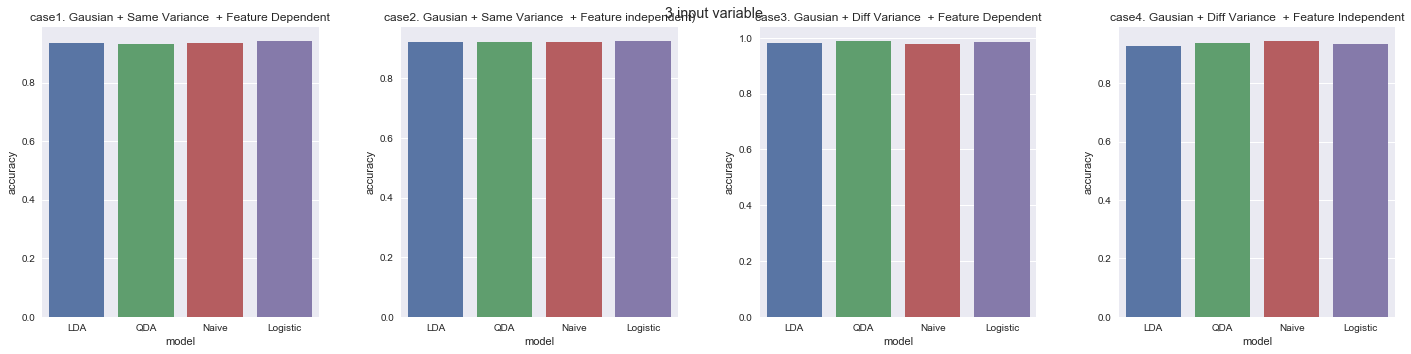

In [527]:
##### 결과

fig=plt.figure(figsize=(20,5))

ax1=fig.add_subplot(1,4,1)
sns.barplot(x='model', y='accuracy', data=result1,ax=ax1)
ax1.set_title('case1. Gausian + Same Variance  + Feature Dependent')

ax2=fig.add_subplot(1,4,2)
sns.barplot(x='model', y='accuracy', data=result2,ax=ax2)
ax2.set_title('case2. Gausian + Same Variance  + Feature independent)')

ax3=fig.add_subplot(1,4,3)
sns.barplot(x='model', y='accuracy', data=result3,ax=ax3)
ax3.set_title('case3. Gausian + Diff Variance  + Feature Dependent')

ax4=fig.add_subplot(1,4,4)
sns.barplot(x='model', y='accuracy', data=result4,ax=ax4)
ax4.set_title('case4. Gausian + Diff Variance  + Feature Independent')

plt.suptitle('3 input variable')
plt.tight_layout()
plt.show()

# Model Fitting with CV

## - 1 input variable

In [689]:
##### (case1. Gausian + Same Variance)
result_accuracy=evaluate_withCV(df1_1)[0]
LDA_coef=evaluate_withCV(df1_1)[1][:5]
Logistic_coef=evaluate_withCV(df1_1)[1][15:]

In [690]:
result_accuracy

,model,accuracy_mean
0,LDA,0.7650
1,QDA,0.7650
2,Naive,0.7650
3,Logistic,0.7625


In [691]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef

,V1
cv1,4.903730
cv2,4.643069
cv3,4.783350
cv4,4.674039
cv5,4.625875


In [616]:
LDA_coef.var(axis=0)

V1    0.01362
dtype: float64

In [617]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1
cv1,3.701526
cv2,3.595006
cv3,3.686748
cv4,3.619638
cv5,3.556506


In [533]:
Logistic_coef.var(axis=0)

V1    0.001478
dtype: float64

In [534]:
##### (case2. Gausian + Differ Variance)
result_accuracy=evaluate_withCV(df1_2)[0]
LDA_coef=evaluate_withCV(df1_2)[1][:5]
Logistic_coef=evaluate_withCV(df1_2)[1][15:]

In [535]:
result_accuracy

,model,accuracy_mean
0,LDA,0.9475
1,QDA,0.9800
2,Naive,0.9800
3,Logistic,0.9650


In [536]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef

,V1
cv1,14.683126
cv2,14.261897
cv3,14.380462
cv4,14.705724
cv5,14.536367


In [537]:
LDA_coef.var(axis=0)

V1    0.036812
dtype: float64

In [538]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1
cv1,6.303264
cv2,6.362261
cv3,6.412513
cv4,6.397062
cv5,6.309131


In [539]:
Logistic_coef.var(axis=0)

V1    0.002473
dtype: float64

## - 2 input variable

In [692]:
##### (case1. Gausian + Same Variance  + Feature Dependent)
result_accuracy=evaluate_withCV(df2_1)[0]
LDA_coef=evaluate_withCV(df2_1)[1][:5]
Logistic_coef=evaluate_withCV(df2_1)[1][15:]

In [693]:
result_accuracy

,model,accuracy_mean
0,LDA,0.8450
1,QDA,0.8450
2,Naive,0.7475
3,Logistic,0.8400


In [694]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef

,V1,V2
cv1,1.369344,-1.261622
cv2,1.425064,-1.292351
cv3,1.434595,-1.288153
cv4,1.408174,-1.282570
cv5,1.383385,-1.248535


In [695]:
LDA_coef.var(axis=0)

V1    0.000756
V2    0.000353
dtype: float64

In [696]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1,V2
cv1,1.364902,-1.262822
cv2,1.452145,-1.322907
cv3,1.439343,-1.308327
cv4,1.412907,-1.301843
cv5,1.381542,-1.258252


In [697]:
Logistic_coef.var(axis=0)

V1    0.001372
V2    0.000826
dtype: float64

In [698]:
##### (case2. Gausian + Same Variance  + Feature independent)
result_accuracy=evaluate_withCV(df2_2)[0]
LDA_coef=evaluate_withCV(df2_2)[1][:5]
Logistic_coef=evaluate_withCV(df2_2)[1][15:]

In [699]:
result_accuracy

,model,accuracy_mean
0,LDA,0.6200
1,QDA,0.6175
2,Naive,0.6125
3,Logistic,0.6225


In [701]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef

,V1,V2
cv1,0.255425,0.139463
cv2,0.291027,0.159277
cv3,0.294463,0.167549
cv4,0.278674,0.146020
cv5,0.299392,0.148088


In [702]:
LDA_coef.var(axis=0)

V1    0.000310
V2    0.000126
dtype: float64

In [703]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1,V2
cv1,0.254213,0.137609
cv2,0.289568,0.156638
cv3,0.292612,0.164211
cv4,0.276760,0.144042
cv5,0.296561,0.145669


In [704]:
Logistic_coef.var(axis=0)

V1    0.000295
V2    0.000113
dtype: float64

In [712]:
##### (case3. Gausian + Differ Variance  + Feature Dependent)
result_accuracy=evaluate_withCV(df2_3)[0]
LDA_coef=evaluate_withCV(df2_3)[1][:5]
Logistic_coef=evaluate_withCV(df2_3)[1][15:]

In [713]:
result_accuracy

,model,accuracy_mean
0,LDA,0.7650
1,QDA,0.7950
2,Naive,0.7750
3,Logistic,0.7725


In [714]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef

,V1,V2
cv1,-0.587319,0.845918
cv2,-0.594391,0.884834
cv3,-0.599255,0.905120
cv4,-0.573635,0.858634
cv5,-0.578701,0.856971


In [715]:
LDA_coef.var(axis=0)

V1    0.000113
V2    0.000583
dtype: float64

In [716]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1,V2
cv1,-0.641105,0.941968
cv2,-0.661672,1.000090
cv3,-0.659324,1.005349
cv4,-0.623925,0.947821
cv5,-0.644960,0.965595


In [717]:
Logistic_coef.var(axis=0)

V1    0.000234
V2    0.000857
dtype: float64

In [718]:
##### (case4. Gausian + Differ Variance  + Feature Independent)
result_accuracy=evaluate_withCV(df2_4)[0]
LDA_coef=evaluate_withCV(df2_4)[1][:5]
Logistic_coef=evaluate_withCV(df2_4)[1][15:]

In [719]:
result_accuracy

,model,accuracy_mean
0,LDA,0.7225
1,QDA,0.7575
2,Naive,0.7575
3,Logistic,0.7225


In [720]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef

,V1,V2
cv1,0.508258,0.360419
cv2,0.491855,0.339018
cv3,0.512379,0.340615
cv4,0.487889,0.339472
cv5,0.511302,0.345052


In [721]:
LDA_coef.var(axis=0)

V1    0.000134
V2    0.000081
dtype: float64

In [722]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1,V2
cv1,0.523817,0.356397
cv2,0.501949,0.336716
cv3,0.519217,0.337708
cv4,0.495010,0.336903
cv5,0.524381,0.340964


In [723]:
Logistic_coef.var(axis=0)

V1    0.000183
V2    0.000070
dtype: float64

## - 3 input variable

In [741]:
##### (case1. Gausian + Same Variance  + Feature Dependent)
result_accuracy=evaluate_withCV(df3_1)[0]
LDA_coef=evaluate_withCV(df3_1)[1][:5]
Logistic_coef=evaluate_withCV(df3_1)[1][15:]

In [742]:
result_accuracy

,model,accuracy_mean
0,LDA,0.8325
1,QDA,0.8325
2,Naive,0.8375
3,Logistic,0.8325


In [743]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef

,V1,V2,V3
cv1,0.609042,0.055133,0.374972
cv2,0.591108,0.059782,0.352088
cv3,0.570739,0.078773,0.337926
cv4,0.605890,0.057659,0.329707
cv5,0.600754,0.062660,0.357736


In [744]:
LDA_coef.var(axis=0)

V1    0.000238
V2    0.000087
V3    0.000311
dtype: float64

In [745]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1,V2,V3
cv1,0.610723,0.061207,0.358892
cv2,0.611312,0.051381,0.339341
cv3,0.584977,0.080996,0.328370
cv4,0.620552,0.064644,0.304695
cv5,0.647003,0.048556,0.358021


In [746]:
Logistic_coef.var(axis=0)

V1    0.000497
V2    0.000165
V3    0.000510
dtype: float64

In [747]:
##### (case2. Gausian + Same Variance  + Feature independent)
result_accuracy=evaluate_withCV(df3_2)[0]
LDA_coef=evaluate_withCV(df3_2)[1][:5]
Logistic_coef=evaluate_withCV(df3_2)[1][15:]

In [748]:
result_accuracy

,model,accuracy_mean
0,LDA,0.8125
1,QDA,0.8100
2,Naive,0.8075
3,Logistic,0.8100


In [749]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef

,V1,V2,V3
cv1,0.499993,0.496859,0.497310
cv2,0.517560,0.459518,0.437481
cv3,0.489024,0.457115,0.484488
cv4,0.509445,0.494348,0.453401
cv5,0.501698,0.467073,0.461721


In [750]:
LDA_coef.var(axis=0)

V1    0.000115
V2    0.000369
V3    0.000577
dtype: float64

In [751]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1,V2,V3
cv1,0.489738,0.490388,0.487044
cv2,0.507542,0.447458,0.428454
cv3,0.474326,0.442494,0.467960
cv4,0.500669,0.486128,0.445050
cv5,0.489380,0.445782,0.444282


In [752]:
Logistic_coef.var(axis=0)

V1    0.000160
V2    0.000561
V3    0.000528
dtype: float64

In [753]:
##### (case3. Gausian + Differ Variance  + Feature Dependent)
result_accuracy=evaluate_withCV(df3_3)[0]
LDA_coef=evaluate_withCV(df3_3)[1][:5]
Logistic_coef=evaluate_withCV(df3_3)[1][15:]

In [754]:
result_accuracy

,model,accuracy_mean
0,LDA,0.9625
1,QDA,0.9700
2,Naive,0.8725
3,Logistic,0.9600


In [755]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef

,V1,V2,V3
cv1,-0.455384,3.480532,-2.633343
cv2,-0.435430,3.489526,-2.694401
cv3,-0.440147,3.442816,-2.657613
cv4,-0.442358,3.345659,-2.595462
cv5,-0.439918,3.499315,-2.700069


In [756]:
LDA_coef.var(axis=0)

V1    0.000057
V2    0.003963
V3    0.001899
dtype: float64

In [757]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1,V2,V3
cv1,-0.434199,3.237749,-2.471670
cv2,-0.335011,3.160768,-2.462147
cv3,-0.367323,3.125427,-2.427247
cv4,-0.375464,3.116422,-2.418716
cv5,-0.356779,3.341104,-2.549056


In [758]:
Logistic_coef.var(axis=0)

V1    0.001372
V2    0.008838
V3    0.002671
dtype: float64

In [759]:
##### (case4. Gausian + Differ Variance  + Feature Independent)
result_accuracy=evaluate_withCV(df3_4)[0]
LDA_coef=evaluate_withCV(df3_4)[1][:5]
Logistic_coef=evaluate_withCV(df3_4)[1][15:]

In [760]:
result_accuracy

,model,accuracy_mean
0,LDA,0.8300
1,QDA,0.8775
2,Naive,0.8800
3,Logistic,0.8375


In [761]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef

,V1,V2,V3
cv1,-0.477238,0.686384,0.115123
cv2,-0.516047,0.672057,0.118747
cv3,-0.480402,0.666435,0.080953
cv4,-0.491040,0.713477,0.074904
cv5,-0.521406,0.703186,0.091548


In [585]:
LDA_coef.var(axis=0)

V1    0.000741
V2    0.000759
V3    0.001316
dtype: float64

In [586]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef

,V1,V2,V3
cv1,1.064738,0.740181,0.881473
cv2,1.008624,0.708259,0.772989
cv3,1.045697,0.703725,0.765304
cv4,1.027074,0.814145,0.752654
cv5,1.028173,0.714852,0.767809


In [587]:
Logistic_coef.var(axis=0)

V1    0.000451
V2    0.002096
V3    0.002784
dtype: float64